# Crude Oil Futures Curve Visualization

This oil thing is getting pretty crazy, especially with Saudi and Iran going bonkers over each other. Futures curves are a great way to speculate, and it'd be great to visualize the movement of the futures curve over different trading days.

I thought this would be a pretty commonsensical thing for yahoo / google finance to provide, but turns out they provide nothing more than a single futures chain (settle prices for futures contracts right now). Historical prices aren't available, and even if they are, they aren't in the form of a futures curve. Instead, they are just prices for the specific contract (eg. the futures contract expiring on Feb 2016, not the front month contract and the contract expiring in one month etc). I want the relative numbers, not the absolute ones, hence this.

I want a plot of the current futures prices for the next 12 months. Here's how to do that simply

In [6]:
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

from __future__ import division

import pandas_datareader.data as data
import pandas_datareader.wb as wb

import pandas as pd

import datetime

import matplotlib
import matplotlib.pyplot as pyplot
matplotlib.style.use('ggplot')

import numpy as np

import Quandl

API_KEY = 'GBnrYBGxwyXXxPZFsqRC'

# pyplot.rcParams['figure.figsize'] = (10, 10)

In Quandl (and in real life), futures contract are named as `AAMYYYY` where `AA` is the type of underlying asset (for WTI crude oil, it is `CL`), `M` is the month (the whole series of months starting from `F` to `Z` is in the array below) and `YYYY` is the year (eg. `2016`). Hence, a futures contract for crude oil expiring in March 2016 will be `CLH2016` or `CLH16` depending on the source of your data.

We make use of this fact and pull our data (in the form of `pandas` dataframes) into a dictionary.

In [2]:
MONTHS = ['F', 'G', 'H', 'J', 'K', 'M', 'N', 'Q', 'U', 'V', 'X', 'Z']
YEARS = [2014, 2015, 2016, 2017, 2018]
PREFIX = 'CME/CL'

dataframes = {}

for month in MONTHS:
    for year in YEARS:
        symbol = '%s%s%d' % (PREFIX, month, year)
        internal_symbol = '%d%s' % (year, month)
        dataframes[internal_symbol] = Quandl.get(symbol, authtoken=API_KEY)
        dataframes[internal_symbol] = dataframes[internal_symbol]['Settle']

Next, we make some functions that extract the futures price at a given date from each of the dataframes (each of the contracts), skipping them if the date doesn't exist. For example, there won't be a settlement price on 5th Jan 2015 for a contract expiring in December 2014.

Then `extract_year` takes the first 12 prices from the list of prices. The keys for the dataframes are in the form of `YYYYMAA` so that the year comes first, simplifying the sorting process. Yes I know this is non conventional.

In [3]:
def get_curve(dataframes, date):
    curve = {}
    for symbol, dataframe in dataframes.iteritems():
        if date in dataframe:
            curve[symbol] = dataframe[date]
    return curve

def extract_year(curve):
    pvs = [curve[symbol] for symbol in sorted(curve)]
    return pvs[:12]

Now we can plot our first graph. This plots the futures curve at a certain date.

In [4]:
def plot_year_curve(date):
    pyplot.plot(extract_year(get_curve(dataframes, date)))

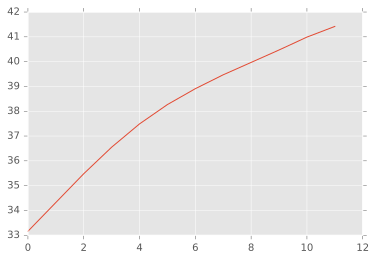

In [7]:
plot_year_curve(datetime.datetime(2016, 1, 8))
pyplot.show()

That's useful, but what I really want to know is how the futures curve has shifted over the last few days. I can do this by plotting a whole bunch of these lines, and varying the gradient such that the ones far back in time are red, and the recent ones are green.

In [8]:
def plot_year_curve_range(date, shift_back_days):
    date_list = [date - datetime.timedelta(days=x) for x in range(0, shift_back_days)]
    for index, date in enumerate(date_list):
        color = (index / len(date_list))
        pyplot.plot(extract_year(get_curve(dataframes, date)), color=(color, 1-color, 0), linewidth=1)

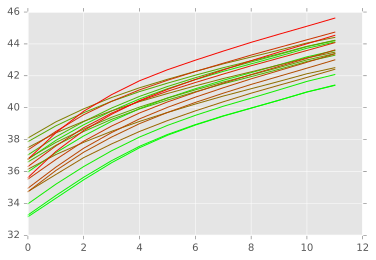

In [9]:
plot_year_curve_range(datetime.datetime(2016, 1, 8), 30)
pyplot.show()

The plot above is the futures curve for the last 30 days (non-trading days are included, so there are less than 30 lines in the graph). What we see that initially, the curve flattened, then dropped in a parallel manner, and finally steepening again. In fact, we can visualize the recent steepening a little closer by looking at the last 10 days.

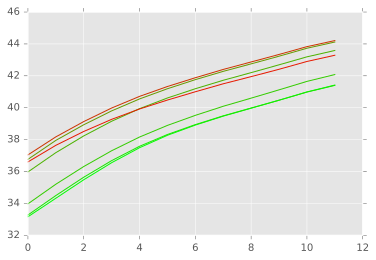

In [10]:
plot_year_curve_range(datetime.datetime(2016, 1, 8), 10)
pyplot.show()

This shows that over the last 10 days, the curve has fallen somewhat more on the short end than on the long end (37 to 33 vs 44 to 41).

We can also abuse this for cool artistic effects.

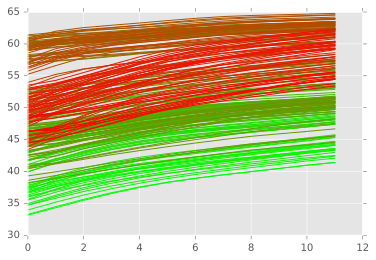

In [11]:
plot_year_curve_range(datetime.datetime(2016, 1, 8), 360)
pyplot.show()